In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('zomato.csv', encoding='latin1')
df1 = pd.read_excel('Country-Code.xlsx')
df_new = pd.merge(df, df1, on='Country Code', how='left')
print("Merged Dataset:")
df_new.head()



Merged Dataset:


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [72]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [73]:
df_new.duplicated().sum()

0

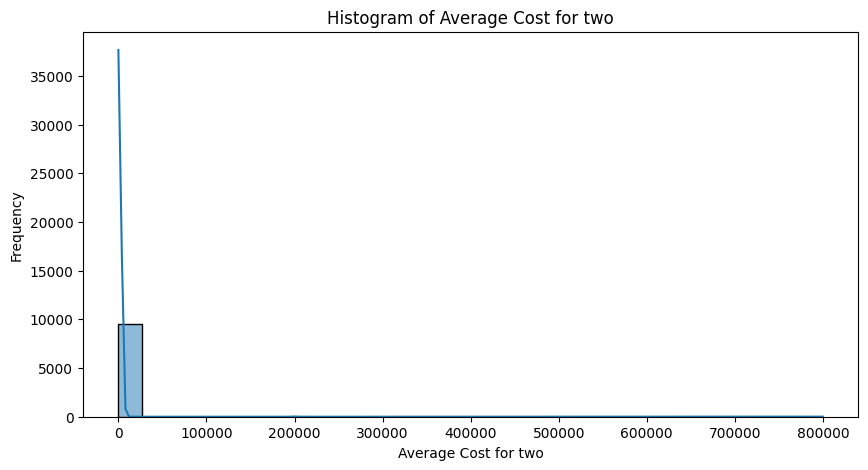

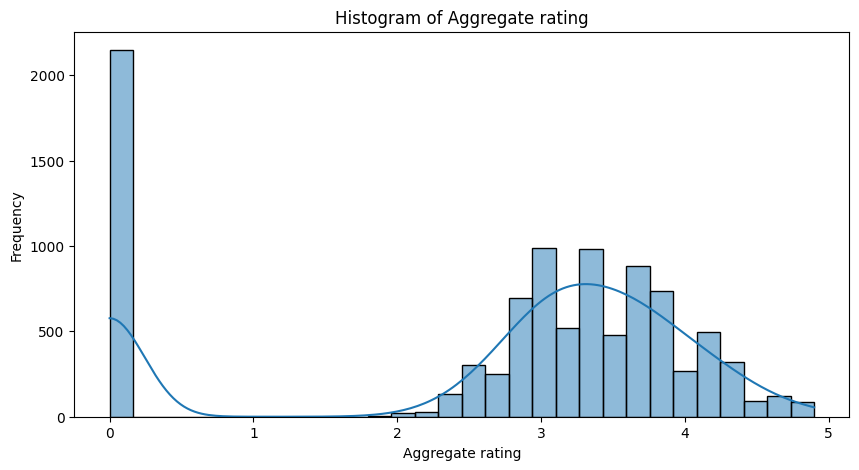

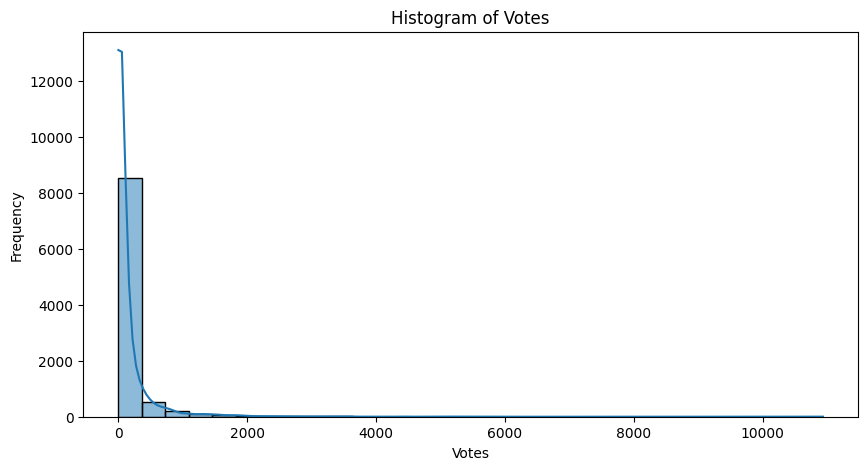

In [74]:
# Univariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df_new, columns, bins=30):
    for col in columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df_new[col].dropna(), bins=bins, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

numeric_col = ['Average Cost for two', 'Aggregate rating', 'Votes']
plot_histograms(df_new, numeric_col)



The first graph shows that the majority of restaurants have a low average cost for two people, with most values clustering around the lower end of the cost spectrum.
The 2nd graph shows that a significant number of restaurants have an aggregate rating of zero, indicating they are either unrated or very poorly rated. The remaining ratings follow a roughly normal distribution, with most ratings clustered between 2.5 and 4, suggesting that the majority of rated restaurants fall in the average to good range.
The 3rd graph shows shows a highly skewed distribution, where the majority of restaurants have received very few votes, with a significant number of restaurants having zero to a few hundred votes, and very few restaurants receiving over 1000 votes. This indicates that most restaurants have low customer engagement in terms of voting.


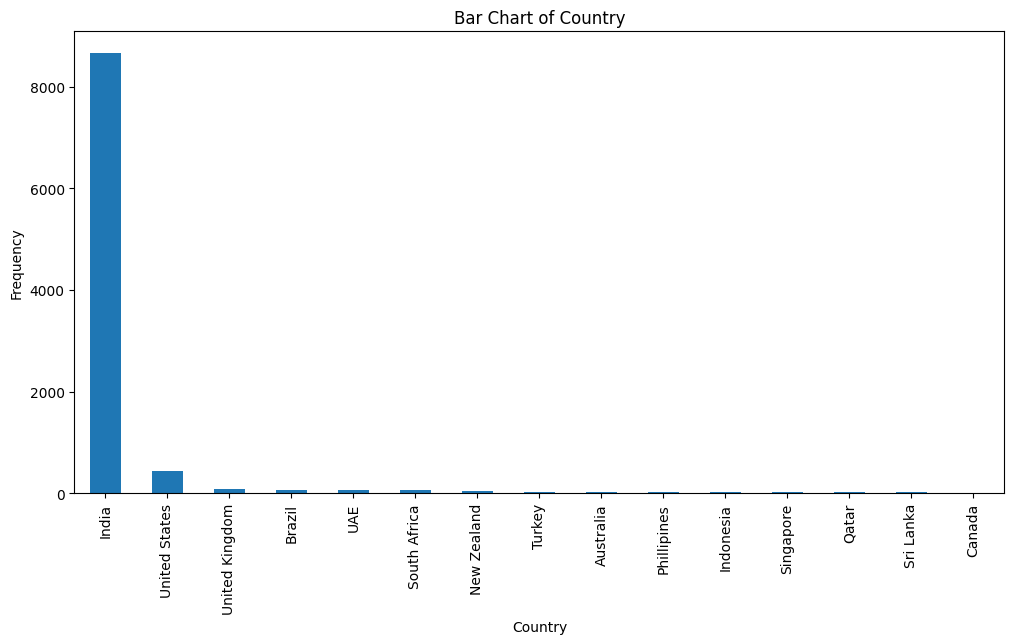

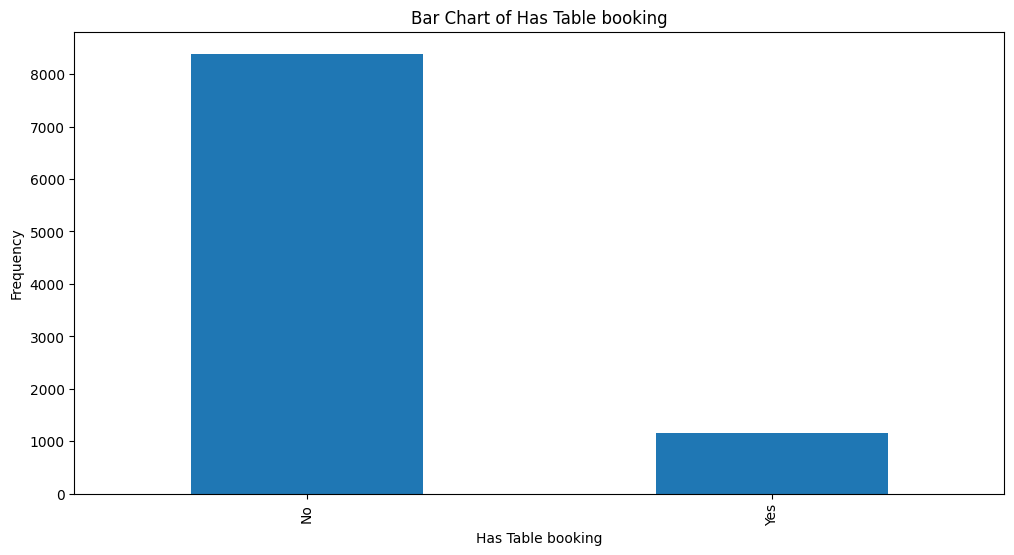

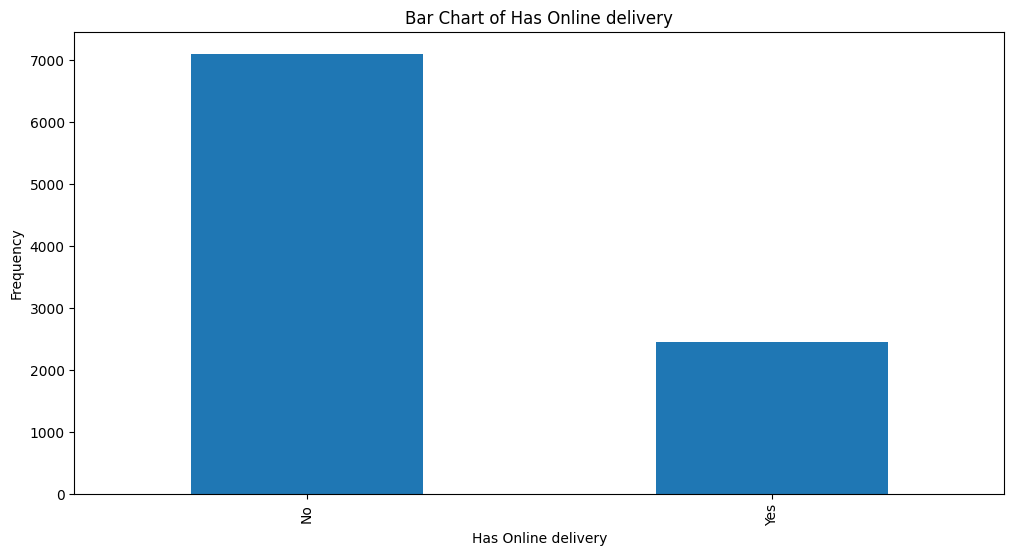

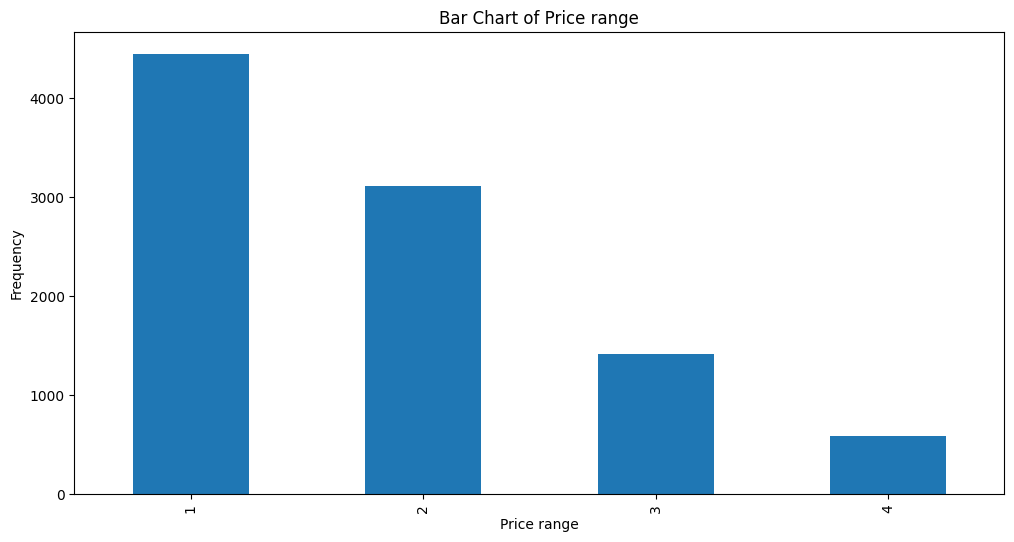

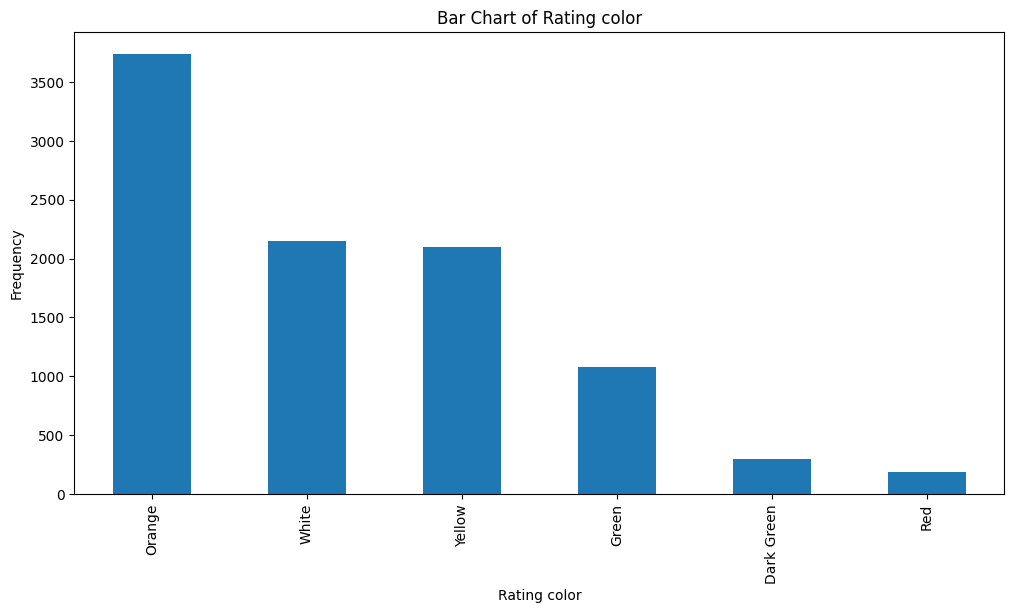

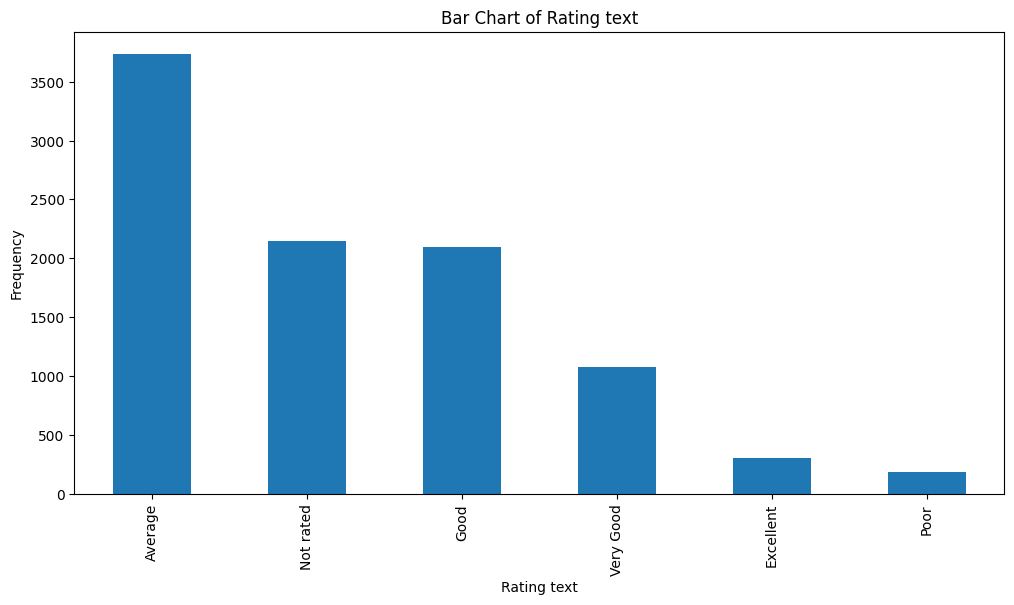

In [76]:
def plot_bar_charts(df_new, columns):
    for col in columns:
        plt.figure(figsize=(12, 6))
        df_new[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

categorical_col = ['Country', 'Has Table booking', 'Has Online delivery', 'Price range', 'Rating color', 'Rating text']

plot_bar_charts(df_new, categorical_col)


The 1st graph indicates that the majority of restaurants in the dataset are located in India, where the United States follows distantly, while other countries have relatively minimal representation.2nd graph  shows that the majority of restaurants do not offer table booking,which is around 8500o.
3rd graph shows that a majority of restaurants do not offer online delivery which is around 7000, that shows it dominat more than online delivery.
The 4th graph indicates that most restaurants fall within the lower price range, 1 and 2, with fewer restaurants in the higher price ranges 3 and 4. This suggests that the majority of restaurants offer more affordable dining options.
The 5th graph shows that the majority of restaurants have 'Orange', "white", and 'Yellow' ratings, indicating average ratings. 'Green' ratings follow, indicating good ratings, while 'Red' ratings are rare, signifying very poor ratings.
The 6th graph shows that most restaurants are rated as 'Average', then followed by "not rated" or 'Good'. 'Very Good' ratings follow less rating i.e. 1000, while 'Excellent' and 'Poor' ratings are much less cthan all.
.

Bivariate Analysis

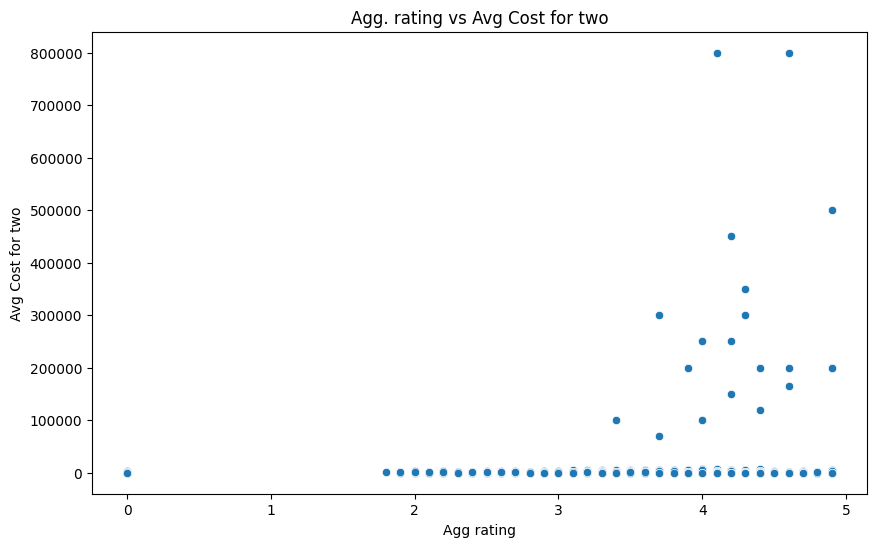

In [77]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Aggregate rating', y='Average Cost for two', data=df_new)
plt.title('Agg. rating vs Avg Cost for two')
plt.xlabel('Agg rating')
plt.ylabel('Avg Cost for two')
plt.show()



The given graph shows a positive correlation between aggregate ratings and average cost for two, indicating that higher-rated restaurants tend to have a higher average cost for two. 

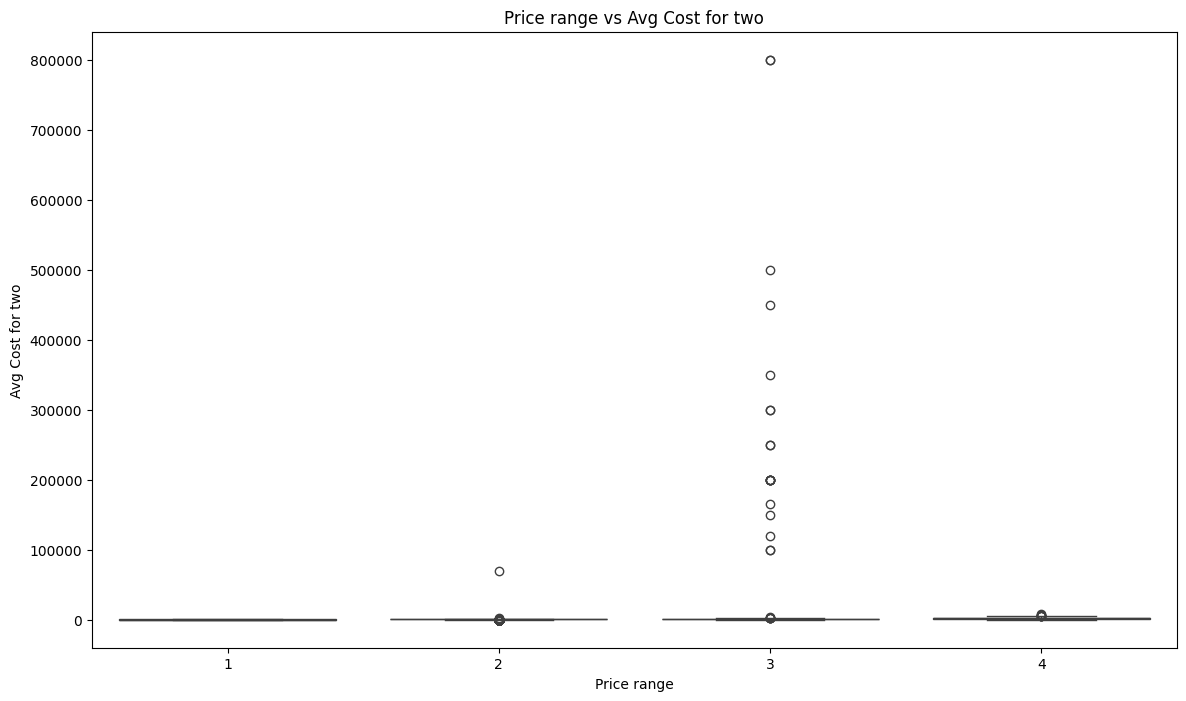

In [78]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Price range', y='Average Cost for two', data=df_new)
plt.title('Price range vs Avg Cost for two')
plt.xlabel('Price range')
plt.ylabel('Avg Cost for two')
plt.show()

The above graph shows is for analysing the average cost for two increases with the price range. Price range 3 has the most significant variation, including several outliers with very high costs, while price ranges 1, 2, and 4 show lower and more consistent average costs.

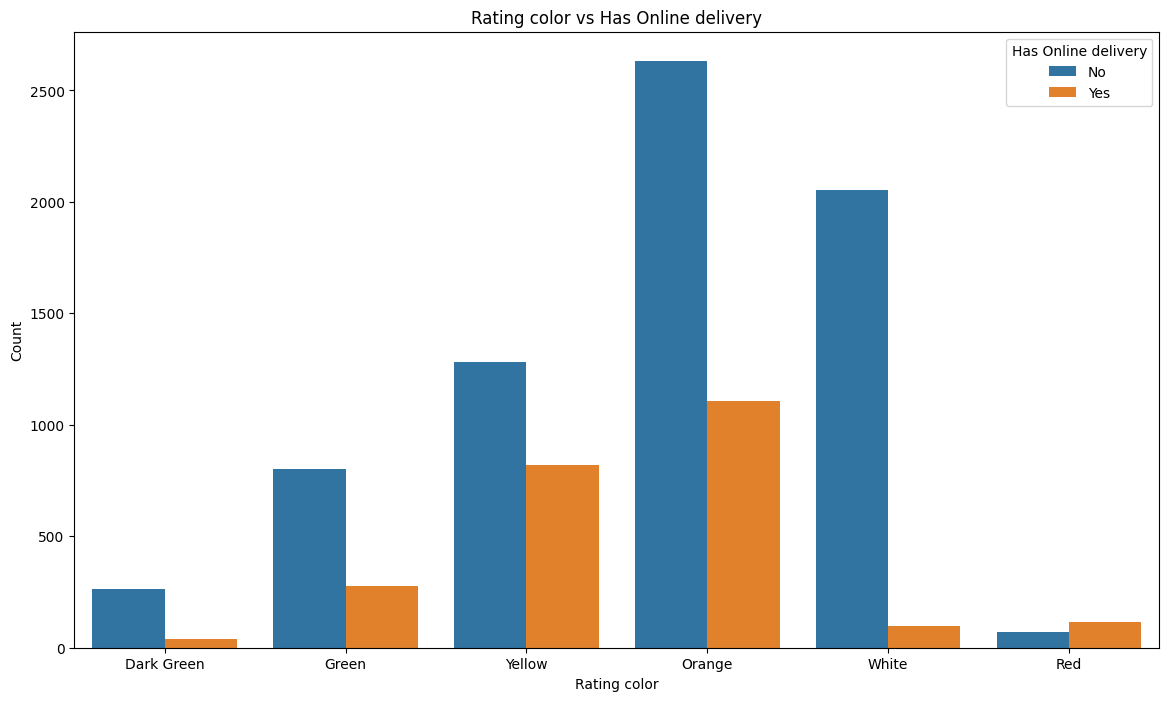

In [79]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Rating color', hue='Has Online delivery', data=df_new)
plt.title('Rating color vs Has Online delivery')
plt.xlabel('Rating color')
plt.ylabel('Count')
plt.show()

The above graph shows that restaurants with 'Orange' and 'White' rating colors, indicating average ratings. Fewer restaurants have 'Green' and 'Dark Green' ratings, signifying good to excellent ratings. Restaurants with 'Yellow' ratings have a moderate presence, while 'Red' ratings, indicating poor performance.

Multivariate analysis

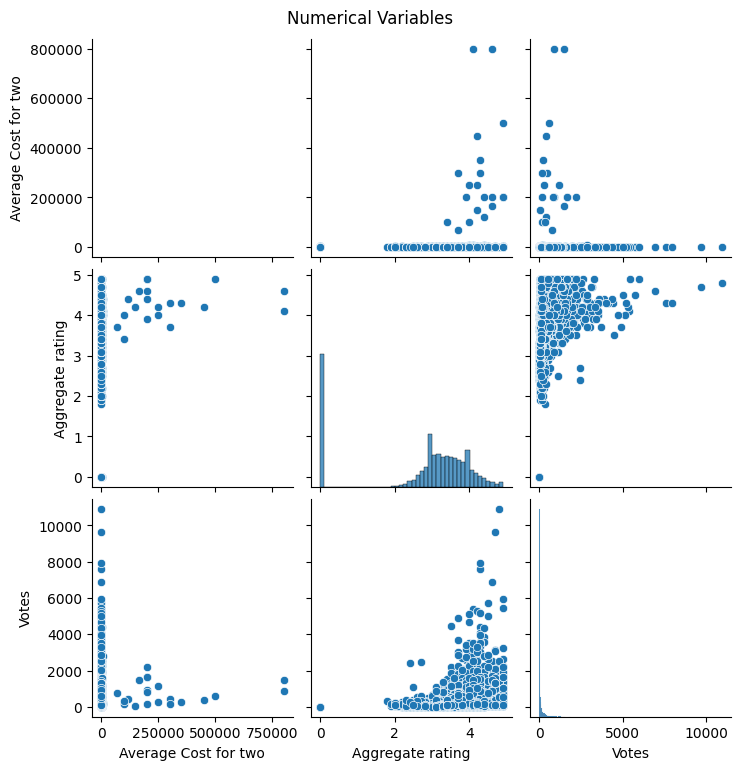

In [80]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_new[['Average Cost for two', 'Aggregate rating', 'Votes']].dropna())
plt.suptitle('Numerical Variables', y=1.02)
plt.show()


The graph shows the relationships among 'Average Cost for two,' 'Aggregate rating,' and 'Votes.' There is a noticeable positive correlation between 'Aggregate rating' and 'Votes,' indicating higher-rated restaurants receive more votes. 'Average Cost for two' shows some correlation with 'Aggregate rating. 'Votes' and 'Average Cost for two' exhibit a less clear relationship, with most votes concentrated in lower cost ranges.

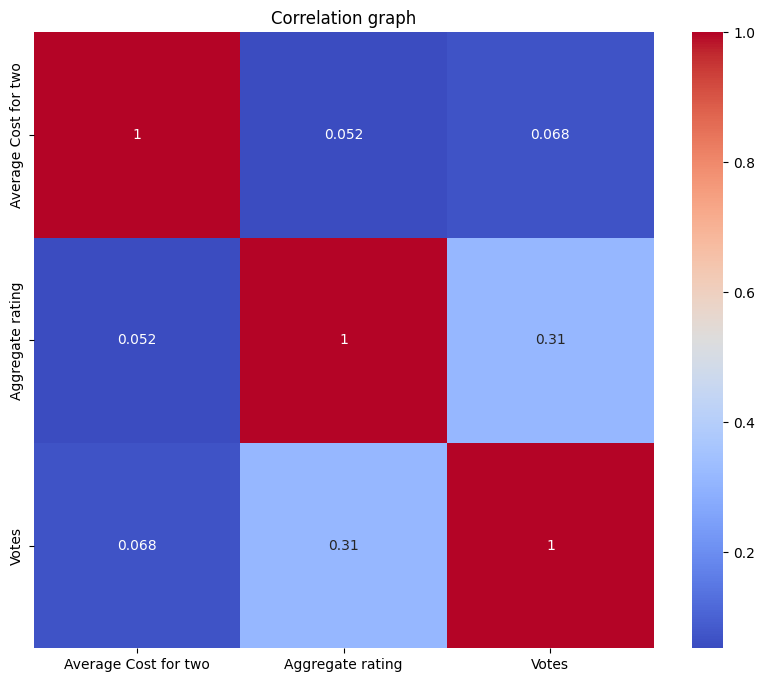

In [81]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_new[['Average Cost for two', 'Aggregate rating', 'Votes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation graph')
plt.show()

The graph shows that 'Votes' and 'Aggregate rating' have a moderate positive correlation (0.31), indicating that higher ratings are associated with more votes. 'Average Cost for two' has a very weak correlation with both 'Aggregate rating' which is 0.052 and 'Votes' which is 0.068, that suggest have not strongly related to both rating and votes.

Data Processing

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
df_new['Total Votes per Cost'] = df_new['Votes'] / df_new['Average Cost for two']
def rating_category(rating):
    if rating >= 4.5:
        return 'Excellent'
    elif rating >= 4.0:
        return 'Very Good'
    elif rating >= 3.5:
        return 'Good'
    elif rating >= 3.0:
        return 'Average'
    else:
        return 'Poor'

df_new['Rating Category'] = df_new['Aggregate rating'].apply(rating_category)

categorical_col = ['Country', 'Has Table booking', 'Has Online delivery', 'Rating color', 'Rating text', 'Rating Category']

label_encoders = {}
for col in categorical_col:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le

one_hot_col = ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Is delivering now', 'Switch to order menu']
df_new = pd.get_dummies(df_new, columns=one_hot_col)

df_new.replace([np.inf, -np.inf], np.nan, inplace=True)
df_new.fillna(df_new.mean(), inplace=True)

X = df_new.drop(['Average Cost for two', 'Price range'], axis=1)
y = df_new['Average Cost for two']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (7640, 20831), y_train shape: (7640,)
X_test shape: (1911, 20831), y_test shape: (1911,)


Mean Squared Error: 167076970.5151689
R-squared: 0.5616308243466157
Training Mean Squared Error: 4.965681678500353e-07
Training R-squared: 0.9999999999999979
Cross-Validation Mean Squared Error: 91124202.43648812


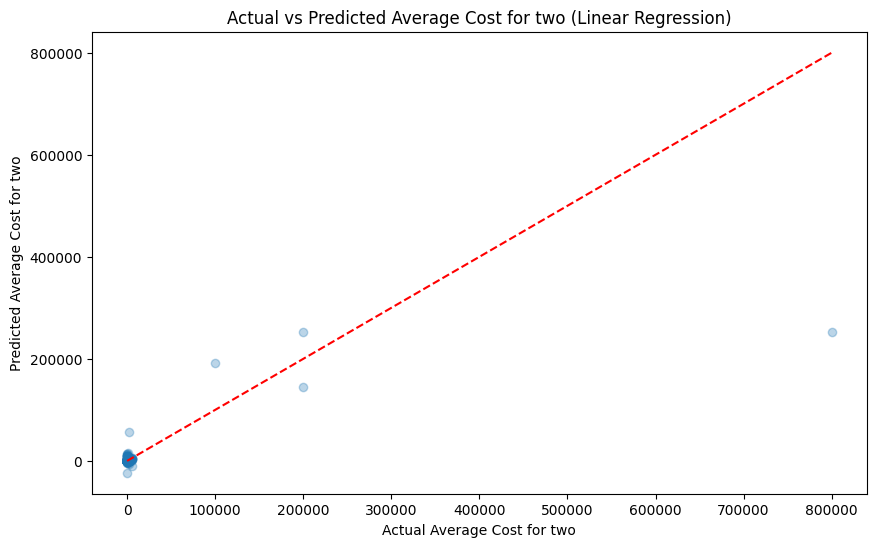

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred)
r2score = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse1}")
print(f"R-squared: {r2score}")

y_train_pred = lr.predict(X_train)
train_mse1 = mean_squared_error(y_train, y_train_pred)
train_r2score = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error: {train_mse1}")
print(f"Training R-squared: {train_r2score}")

cv1 = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse1 = -cv1.mean()
print(f"Cross-Validation Mean Squared Error: {cv_mse1}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.title('Actual vs Predicted Average Cost for two (Linear Regression)')
plt.show()


Here the graph shows shows a strong positive correlation along the red line, indicating good predictive performance. However, the presence of some outliers suggests that the model facing with extreme values.

Mean Squared Error (Tree): 167076970.5151689
R-squared (Tree): 0.5616308243466157
Training Mean Squared Error (Tree): 0.0
Training R-squared (Tree): 1.0
Cross-Validation Mean Squared Error (Tree): 92610635.58979058


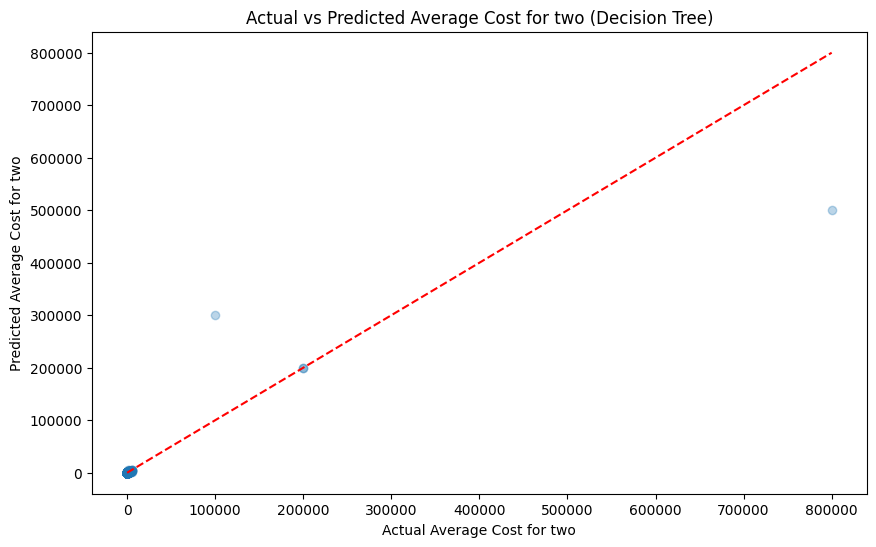

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred)
r2t = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Tree): {mse2}")
print(f"R-squared (Tree): {r2t}")

y_train_pred2 = dt.predict(X_train)
train_mse2 = mean_squared_error(y_train, y_train_pred2)
train_r2t = r2_score(y_train, y_train_pred2)

print(f"Training Mean Squared Error (Tree): {train_mse2}")
print(f"Training R-squared (Tree): {train_r2t}")

cvt = cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mset = -cvt.mean()
print(f"Cross-Validation Mean Squared Error (Tree): {cv_mset}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.title('Actual vs Predicted Average Cost for two (Decision Tree)')
plt.show()


The graph shows a positive correlation along the red line. It indicates good predictive performance, the model exhibits more variability and some outliers also, which suggest to having overfitting to certain data points.

Mean Squared Error (Forest): 134637735.21357846
R-squared (Forest): 0.6467434571297992
Training Mean Squared Error (Forest): 9140793.380737266
Training R-squared (Forest): 0.9601763159698258
Cross-Validation Mean Squared Error (Forest): 62304395.99417524


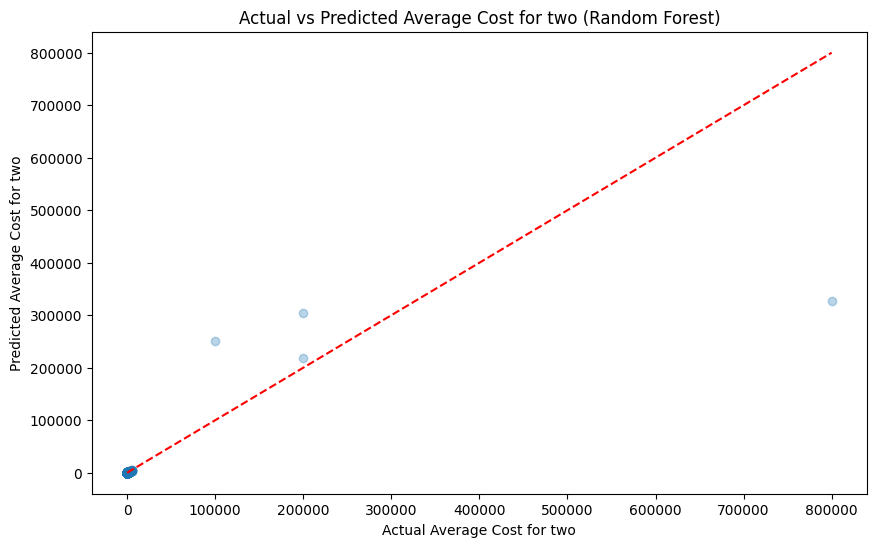

In [85]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(n_estimators=100, random_state=42)
random.fit(X_train, y_train)
y_pred3 = random.predict(X_test)

mse4 = mean_squared_error(y_test, y_pred3)
r2_random = r2_score(y_test, y_pred3)

print(f"Mean Squared Error (Forest): {mse4}")
print(f"R-squared (Forest): {r2_random}")

y_train_pred1 = random.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred1)
train_r2 = r2_score(y_train, y_train_pred1)

print(f"Training Mean Squared Error (Forest): {train_mse}")
print(f"Training R-squared (Forest): {train_r2}")

cv_score = cross_val_score(random, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse5 = -cv_score.mean()
print(f"Cross-Validation Mean Squared Error (Forest): {cv_mse5}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred3, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.title('Actual vs Predicted Average Cost for two (Random Forest)')
plt.show()


The graph shows strong positive correlation along the red line, indicating good predictive accuracy. However, some outliers suggest the model may struggle with extreme values, but overall, it showing better result than the decision tree model.

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid1 = {
    'n_estimators': [10, 20],
    'max_features': ['auto'],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid_search1 = GridSearchCV(estimator=random, param_grid=param_grid1, cv=3, n_jobs=-1, verbose=2)
grid_search1.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': ['auto'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [10, 20]},
             verbose=2)

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Mean Squared Error (Best Model): 130392400.7313219
R-squared (Best Model): 0.657882178233141


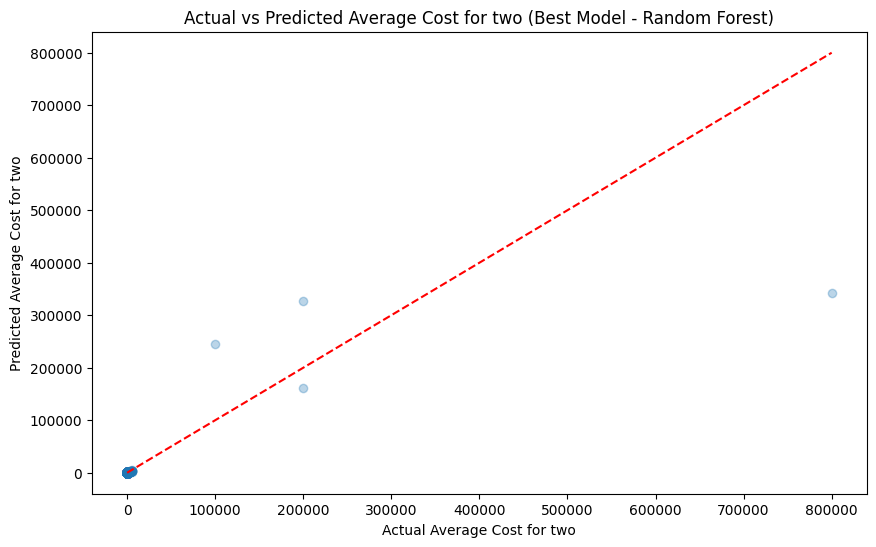

In [89]:
best_params1 = grid_search1.best_params_
best_model1 = grid_search1.best_estimator_

print(f"Best Parameters: {best_params1}")
y_pred_new = best_model1.predict(X_test)

mse_best1 = mean_squared_error(y_test, y_pred_new)
r2_best1 = r2_score(y_test, y_pred_new)

print(f"Mean Squared Error (Best Model): {mse_best1}")
print(f"R-squared (Best Model): {r2_best1}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_new, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Average Cost for two')
plt.ylabel('Predicted Average Cost for two')
plt.title('Actual vs Predicted Average Cost for two (Best Model - Random Forest)')
plt.show()


The graph shows a strong alignment with the red line, with high predictive accuracy. But there are a few outliers, the model overall demonstrates excellent performance in capturing the relationship between actual and predicted costs.

In [90]:
X = df_new.drop(['Average Cost for two', 'Price range'], axis=1)
y = df_new['Price range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train_price shape: {X_train.shape}, y_train_price shape: {y_train.shape}")
print(f"X_test_price shape: {X_test.shape}, y_test_price shape: {y_test.shape}")

X_train_price shape: (7640, 20831), y_train_price shape: (7640,)
X_test_price shape: (1911, 20831), y_test_price shape: (1911,)


In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_ptree = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_ptree)
classification_report = classification_report(y_test, y_pred_ptree)
confusion_mat = confusion_matrix(y_test, y_pred_ptree)

print(f"Accuracy (Tree): {accuracy}")
print(f"Classification Report (Tree):\n{classification_report}")
print(f"Confusion Matrix (Tree):\n{confusion_mat}")

Accuracy (Tree): 0.8608058608058609
Classification Report (Tree):
              precision    recall  f1-score   support

           1       0.95      0.93      0.94       907
           2       0.83      0.87      0.85       618
           3       0.68      0.70      0.69       266
           4       0.73      0.62      0.67       120

    accuracy                           0.86      1911
   macro avg       0.80      0.78      0.79      1911
weighted avg       0.86      0.86      0.86      1911

Confusion Matrix (Tree):
[[847  57   2   1]
 [ 40 537  40   1]
 [  1  53 186  26]
 [  0   0  45  75]]


The outcome shows for the decision tree model having an overall accuracy of 86%. Class 1 has the highest precision and recall i.e. 0.93, indicating the model performs well in identifying low-cost categories. Performance decreases for higher price ranges, particularly for class 4, which has lower precision and recall values. The confusion matrix indicates that most misclassifications occur between adjacent classes, reflecting the model's difficulty in distinguishing between similar price ranges.

In [93]:
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"Training Accuracy (Tree): {train_accuracy}")

cv_score = cross_val_score(clf, X_train, y_train, cv=5)
cv_accuracy = cv_score.mean()
print(f"Cross-Validation Accuracy (Tree): {cv_accuracy}")

Training Accuracy (Tree): 1.0
Cross-Validation Accuracy (Tree): 0.8383507853403142


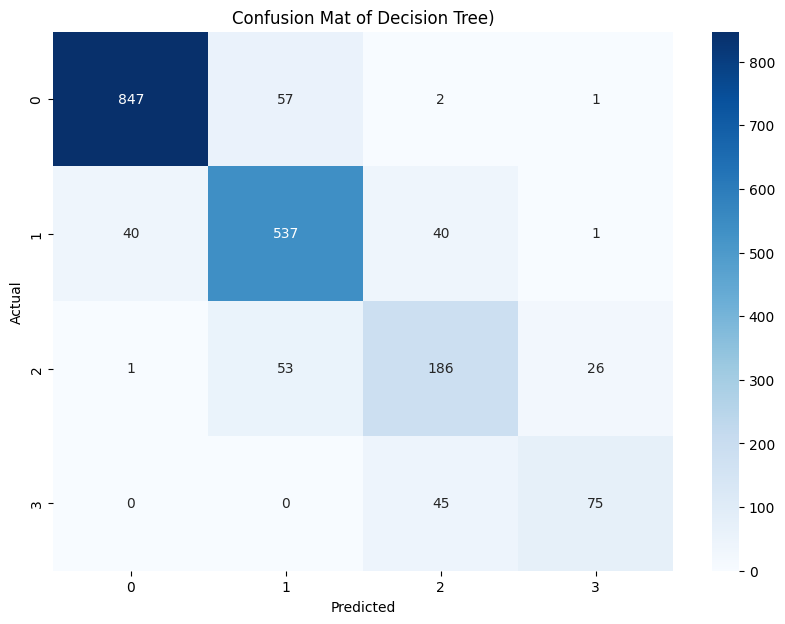

In [94]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Mat of Decision Tree)')
plt.show()


The above matrix shows that the model predicts class 1 which is 'low-cost' most accurately, with 847 true positives and few misclassifications. Misclassifications mostly occur between adjacent classes, such as predicting class 2 when the actual class is 1 or 3. This indicates the model's difficulty in differentiating between similar price ranges, particularly for higher costs.

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
randomf = RandomForestClassifier(n_estimators=100, random_state=42)
randomf.fit(X_train, y_train)
y_pred_random = randomf.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_random)
classification_report1 = classification_report(y_test, y_pred_random)
confusion_mat1 = confusion_matrix(y_test, y_pred_random)
print(f"Accuracy (Forest): {accuracy1}")
print(f"Classification Report (Forest):\n{classification_report1}")
print(f"Confusion Matrix (Forest):\n{confusion_mat1}")
y_train_pred = randomf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (Forest): {train_accuracy}")


Accuracy (Forest): 0.7216117216117216
Classification Report (Forest):
              precision    recall  f1-score   support

           1       0.79      0.88      0.83       907
           2       0.67      0.61      0.64       618
           3       0.58      0.61      0.60       266
           4       0.68      0.35      0.46       120

    accuracy                           0.72      1911
   macro avg       0.68      0.61      0.63      1911
weighted avg       0.72      0.72      0.71      1911

Confusion Matrix (Forest):
[[795 104   8   0]
 [193 380  42   3]
 [ 12  75 162  17]
 [  1  11  66  42]]
Training Accuracy (Forest): 1.0


The above outcome shows an overall accuracy of 72%. Class 1, i.e' low-cost' has the highest precision which is 0.79 and recall which is 0.88. Performance decreases for higher price ranges, especially for class 3 and 4, which have lower precision and recall. The confusion matrix indicates that most misclassifications occur between adjacent classes, reflecting the model's difficulty in distinguishing between similar price ranges. The training accuracy of 1.0 suggests overfitting.

In [98]:
cv_score2 = cross_val_score(randomf, X_train, y_train, cv=5)
cv_accuracy = cv_score2.mean()
print(f"Cross-Validation Accuracy (Forest): {cv_accuracy}")


Cross-Validation Accuracy (Forest): 0.7176701570680628



The cv accuracy is 71.77%, indicating consistent performance across different folds. This validates the model's overall accuracy of 72%,while highlighting potential overfitting, given the perfect training accuracy.

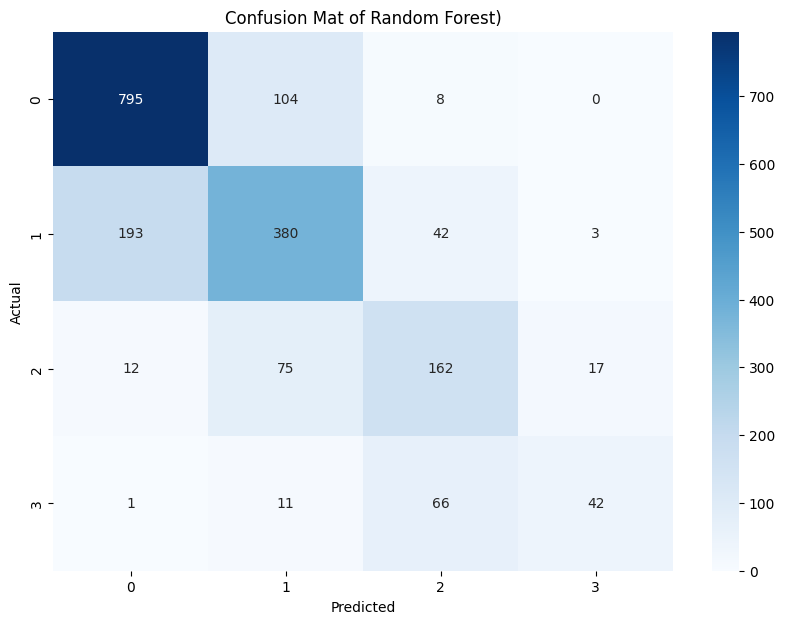

In [99]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Mat of Random Forest)')
plt.show()

The graph shows shows that class 1 which is 'low-cost' is predicted most accurately, with 795 true positives. Misclassifications primarily occur between adjacent classes, particularly between classes 0 and 1, and classes 2 and 3. This indicates the model's difficulty in differentiating between similar price ranges, that leads to misclassification across adjacent classes.

In [101]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_price = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_price)
classification_report1 = classification_report(y_test, y_pred_price)
confusion_mat3 = confusion_matrix(y_test, y_pred_price)

print(f"Accuracy (Logistic Regression): {accuracy_lr}")
print(f"Classification Report (Logistic Regression):\n{classification_report1}")
print(f"Confusion Matrix (Logistic Regression):\n{confusion_mat3}")

y_train_pred = lr.predict(X_train)
train_accuracy= accuracy_score(y_train, y_train_pred)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy (Logistic Regression): 0.47462061747776035
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       0.47      1.00      0.64       907
           2       0.00      0.00      0.00       618
           3       0.00      0.00      0.00       266
           4       0.00      0.00      0.00       120

    accuracy                           0.47      1911
   macro avg       0.12      0.25      0.16      1911
weighted avg       0.23      0.47      0.31      1911

Confusion Matrix (Logistic Regression):
[[907   0   0   0]
 [618   0   0   0]
 [266   0   0   0]
 [120   0   0   0]]


The model has an accuracy of 47%. It correctly identifies 'low-cost' but fails to predict higher price ranges  which is classes 2, 3, and 4, identifying wrongly all of them as 'low-cost.' This shows the model struggles with distinguishing between different price ranges.

In [102]:
print(f"Training Accuracy (Logistic Regression): {train_accuracy}")

cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
cv_accuracy_lr = cv_scores_lr.mean()
print(f"Cross-Validation Accuracy (Logistic Regression): {cv_accuracy_lr}")

Training Accuracy (Logistic Regression): 0.4629581151832461
Cross-Validation Accuracy (Logistic Regression): 0.46295811518324614


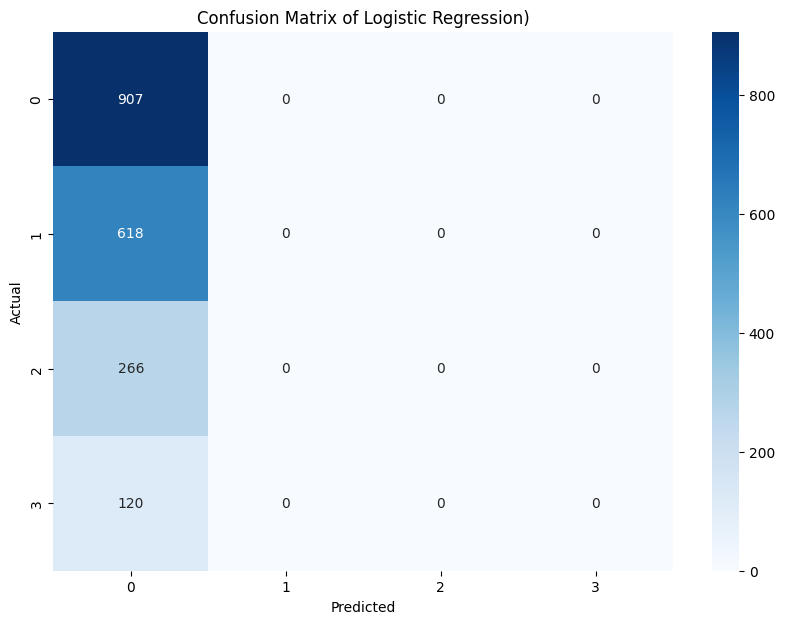

In [103]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression)')
plt.show()

The confusion matrix for this model shows that it only predicts the 'low-cost'correctly. All other classes, i.e. 2, 3, and 4 are misclassified as class 1, indicating the model fails to distinguish between different price ranges.

In [104]:
from sklearn.model_selection import GridSearchCV
param_grid3 = {
    'n_estimators': [50, 100], 
    'max_features': ['auto', 'sqrt'], 
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]  
}



In [105]:
grid_search3 = GridSearchCV(estimator=randomf, param_grid=param_grid3, cv=3, n_jobs=-1, verbose=2)
grid_search3.fit(X_train, y_train)
best_params_new = grid_search3.best_params_
best_model_new = grid_search3.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [106]:
print(f"Best Parameters: {best_params_new}")
y_pred_best = best_model_new.predict(X_test)

Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [107]:
accuracy = accuracy_score(y_test, y_pred_best)
classification_report = classification_report(y_test, y_pred_best)
confusion_mat = confusion_matrix(y_test, y_pred_best)

In [108]:
print(f"Accuracy (Best Model): {accuracy}")
print(f"Classification Report (Best Model):\n{classification_report}")
print(f"Confusion Matrix (Best Model):\n{confusion_mat}")

Accuracy (Best Model): 0.5688121402407117
Classification Report (Best Model):
              precision    recall  f1-score   support

           1       0.58      0.95      0.72       907
           2       0.52      0.28      0.37       618
           3       0.50      0.17      0.26       266
           4       0.62      0.04      0.08       120

    accuracy                           0.57      1911
   macro avg       0.56      0.36      0.36      1911
weighted avg       0.55      0.57      0.50      1911

Confusion Matrix (Best Model):
[[862  42   3   0]
 [431 174  12   1]
 [128  90  46   2]
 [ 55  29  31   5]]


The above model has an accuracy of 56.88%. It performs best for 'low-cost' with a precision of 0.58 and recall of 0.95. Performance for higher price ranges is lower, with precision and recall significantly dropping, especially for class 3. The confusion matrix shows that misclassifications occur mostly between adjacent classes, indicating difficulty in distinguishing between similar price ranges.

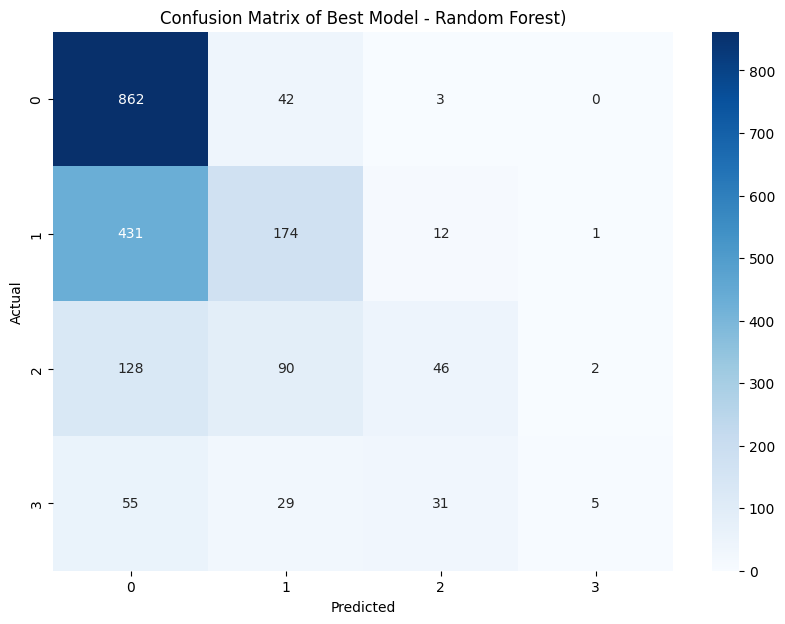

In [109]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best Model - Random Forest)')
plt.show()

The confusion matrix for the best model shows that class 1 i.e. 'low-cost' is predicted most accurately with 862 true positives. Misclassifications are common between adjacent classes, particularly between classes 0 and 1, and classes 2 and 3. This indicates the model has difficulty distinguishing between similar price ranges, but it performs better overall than previous models.

By evaluating all the models, Best Model for 'Average Cost for Two' is the Random Forest model which shows the best performance, handling variability well and maintaining strong predictive accuracy.
Best Model for 'Price Range' features is Random Forest model with hyperparameter tuning is the most suitable, achieving the highest overall accuracy and better performance across different price ranges compared to other models.
Overall, the Random Forest model, both normal and tuned versions consistently outperforms others, making it the best choice for both 'Average Cost for Two' and 'Price Range' predictions.